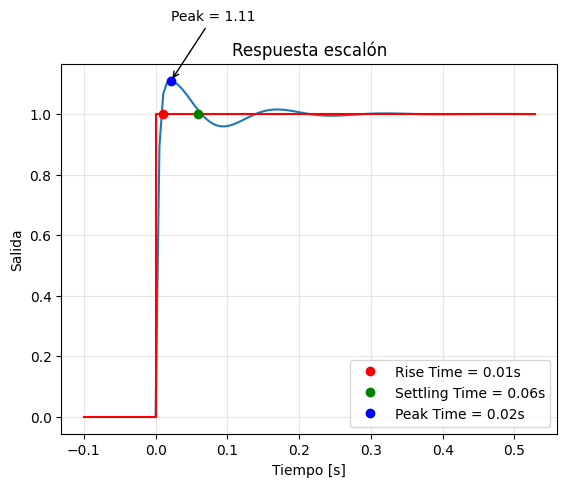

In [14]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

K = 2652.28
p = 64.986
Kp = 3.89
tauD = 0.027
tauI = 0.017

tf = signal.lti([p+K*Kp*tauD, K*Kp, K*Kp/tauI], [1, p + K*Kp*tauD, K*Kp, K*Kp/tauI])

t, y = signal.step(tf)

plt.plot(t, y)
plt.step([-0.1, 0, t[-1]], [0, 1 , 1], 'r', where='post')
plt.grid(alpha=0.3)
plt.xlabel('Tiempo [s]')
plt.ylabel('Salida')
plt.title('Respuesta escalón')
# Calculate rise time, settling time, and peak time
rise_time = t[np.argmax(y > 1)] - t[0]
settling_time = t[np.argmax(np.abs(y - 1) < 0.02)] - t[0]
peak_time = t[np.argmax(y)]

# Plot the points on the graph
plt.plot(rise_time, 1, 'ro', label=f'Rise Time = {rise_time:.2f}s')
plt.plot(settling_time, 1, 'go', label=f'Settling Time = {settling_time:.2f}s')
plt.plot(peak_time, np.max(y), 'bo', label=f'Peak Time = {peak_time:.2f}s')
# Add annotation for peak value
plt.annotate(f'Peak = {np.max(y):.2f}', xy=(peak_time, np.max(y)), xytext=(peak_time, np.max(y)+0.2),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

# Add legend and show the plot
plt.legend()
plt.show()